# MNIST Autoencoder



In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
from keras.datasets import mnist
 
import numpy as np
import matplotlib.pyplot as plt

import re
import math

np.random.seed(123)

Using TensorFlow backend.


#Import MNIST

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28, 1)

#Add some noise to the set
adding random pixels to the input set to create noise for decoding

In [0]:
X_train_noisy = X_train + 0.5 * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + 0.5 * np.random.normal(size=X_test.shape)
 
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)


# Create the model
Autoencoders shrink the image down to a small scale then restore them to full size as the output using Maxpooling and UpSampling respectively.

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='elu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
 
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='elu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='elu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='elu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='elu', padding='same'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 8)           584       
__________

# Train the Model

In [0]:
model.fit(X_train_noisy, X_train, epochs=100, batch_size=128, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 9s 181us/step - loss: 0.0505 - val_loss: 0.0406
Epoch 2/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0357 - val_loss: 0.0326
Epoch 3/100
48000/48000 [==============================] - 8s 176us/step - loss: 0.0307 - val_loss: 0.0292
Epoch 4/100
 7424/48000 [===>..........................] - ETA: 6s - loss: 0.0291

48000/48000 [==============================] - 8s 173us/step - loss: 0.0280 - val_loss: 0.0271
Epoch 5/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0263 - val_loss: 0.0257
Epoch 6/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0251 - val_loss: 0.0247
Epoch 7/100
33152/48000 [===================>..........] - ETA: 2s - loss: 0.0243

48000/48000 [==============================] - 8s 172us/step - loss: 0.0242 - val_loss: 0.0239
Epoch 8/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0235 - val_loss: 0.0235
Epoch 9/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0229 - val_loss: 0.0227
Epoch 10/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0224

48000/48000 [==============================] - 8s 175us/step - loss: 0.0224 - val_loss: 0.0223
Epoch 11/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0219 - val_loss: 0.0217
Epoch 12/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0215 - val_loss: 0.0217
Epoch 13/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0212

48000/48000 [==============================] - 8s 175us/step - loss: 0.0212 - val_loss: 0.0211
Epoch 14/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0209 - val_loss: 0.0209
Epoch 15/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0206 - val_loss: 0.0206
Epoch 16/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0204

48000/48000 [==============================] - 8s 174us/step - loss: 0.0204 - val_loss: 0.0204
Epoch 17/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0202 - val_loss: 0.0202
Epoch 18/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0200 - val_loss: 0.0199
Epoch 19/100
37760/48000 [======================>.......] - ETA: 1s - loss: 0.0198

48000/48000 [==============================] - 8s 172us/step - loss: 0.0198 - val_loss: 0.0199
Epoch 20/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0196 - val_loss: 0.0196
Epoch 21/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0194 - val_loss: 0.0196
Epoch 22/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0193

48000/48000 [==============================] - 8s 174us/step - loss: 0.0193 - val_loss: 0.0192
Epoch 23/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0191 - val_loss: 0.0194
Epoch 24/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0190 - val_loss: 0.0191
Epoch 25/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0189

48000/48000 [==============================] - 8s 171us/step - loss: 0.0189 - val_loss: 0.0190
Epoch 26/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0188 - val_loss: 0.0187
Epoch 27/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0187 - val_loss: 0.0188
Epoch 28/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0186

48000/48000 [==============================] - 8s 172us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 29/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0184 - val_loss: 0.0187
Epoch 30/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0183 - val_loss: 0.0184
Epoch 31/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0182

48000/48000 [==============================] - 8s 173us/step - loss: 0.0182 - val_loss: 0.0183
Epoch 32/100
48000/48000 [==============================] - 8s 170us/step - loss: 0.0181 - val_loss: 0.0183
Epoch 33/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0180 - val_loss: 0.0181
Epoch 34/100
38400/48000 [=======================>......] - ETA: 1s - loss: 0.0180

48000/48000 [==============================] - 8s 174us/step - loss: 0.0180 - val_loss: 0.0182
Epoch 35/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0179 - val_loss: 0.0182
Epoch 36/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0178 - val_loss: 0.0180
Epoch 37/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0178

48000/48000 [==============================] - 8s 175us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 38/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0177 - val_loss: 0.0178
Epoch 39/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0176 - val_loss: 0.0178
Epoch 40/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0175

48000/48000 [==============================] - 8s 173us/step - loss: 0.0175 - val_loss: 0.0177
Epoch 41/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0175 - val_loss: 0.0178
Epoch 42/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0175 - val_loss: 0.0175
Epoch 43/100
37632/48000 [======================>.......] - ETA: 1s - loss: 0.0174

48000/48000 [==============================] - 8s 175us/step - loss: 0.0174 - val_loss: 0.0176
Epoch 44/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0173 - val_loss: 0.0176
Epoch 45/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0173 - val_loss: 0.0176
Epoch 46/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0172

48000/48000 [==============================] - 8s 171us/step - loss: 0.0172 - val_loss: 0.0176
Epoch 47/100
48000/48000 [==============================] - 8s 171us/step - loss: 0.0172 - val_loss: 0.0174
Epoch 48/100
48000/48000 [==============================] - 8s 171us/step - loss: 0.0171 - val_loss: 0.0172
Epoch 49/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0171

48000/48000 [==============================] - 8s 171us/step - loss: 0.0171 - val_loss: 0.0172
Epoch 50/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0171 - val_loss: 0.0171
Epoch 51/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0170 - val_loss: 0.0172
Epoch 52/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0169

48000/48000 [==============================] - 8s 174us/step - loss: 0.0170 - val_loss: 0.0171
Epoch 53/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0169 - val_loss: 0.0174
Epoch 54/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0169 - val_loss: 0.0170
Epoch 55/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0169

48000/48000 [==============================] - 8s 169us/step - loss: 0.0169 - val_loss: 0.0171
Epoch 56/100
48000/48000 [==============================] - 8s 170us/step - loss: 0.0168 - val_loss: 0.0169
Epoch 57/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0168 - val_loss: 0.0172
Epoch 58/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0167

48000/48000 [==============================] - 8s 172us/step - loss: 0.0168 - val_loss: 0.0170
Epoch 59/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0167 - val_loss: 0.0169
Epoch 60/100
48000/48000 [==============================] - 8s 170us/step - loss: 0.0167 - val_loss: 0.0169
Epoch 61/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0166

48000/48000 [==============================] - 8s 174us/step - loss: 0.0166 - val_loss: 0.0169
Epoch 62/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 63/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0166 - val_loss: 0.0168
Epoch 64/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0166

48000/48000 [==============================] - 8s 172us/step - loss: 0.0166 - val_loss: 0.0168
Epoch 65/100
48000/48000 [==============================] - 8s 171us/step - loss: 0.0166 - val_loss: 0.0167
Epoch 66/100
48000/48000 [==============================] - 8s 169us/step - loss: 0.0165 - val_loss: 0.0167
Epoch 67/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0165

48000/48000 [==============================] - 8s 173us/step - loss: 0.0165 - val_loss: 0.0165
Epoch 68/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0164 - val_loss: 0.0166
Epoch 69/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0165 - val_loss: 0.0166
Epoch 70/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0164

48000/48000 [==============================] - 8s 172us/step - loss: 0.0164 - val_loss: 0.0166
Epoch 71/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0164 - val_loss: 0.0166
Epoch 72/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0164 - val_loss: 0.0166
Epoch 73/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0163

48000/48000 [==============================] - 8s 173us/step - loss: 0.0163 - val_loss: 0.0165
Epoch 74/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0163 - val_loss: 0.0165
Epoch 75/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0163 - val_loss: 0.0164
Epoch 76/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0163

48000/48000 [==============================] - 8s 173us/step - loss: 0.0163 - val_loss: 0.0164
Epoch 77/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0162 - val_loss: 0.0164
Epoch 78/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0162 - val_loss: 0.0168
Epoch 79/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0162

48000/48000 [==============================] - 8s 174us/step - loss: 0.0162 - val_loss: 0.0163
Epoch 80/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0162 - val_loss: 0.0164
Epoch 81/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0162 - val_loss: 0.0165
Epoch 82/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0162

48000/48000 [==============================] - 8s 173us/step - loss: 0.0162 - val_loss: 0.0162
Epoch 83/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0161 - val_loss: 0.0164
Epoch 84/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0161 - val_loss: 0.0163
Epoch 85/100
38144/48000 [======================>.......] - ETA: 1s - loss: 0.0161

48000/48000 [==============================] - 8s 174us/step - loss: 0.0161 - val_loss: 0.0165
Epoch 86/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0161 - val_loss: 0.0166
Epoch 87/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0161 - val_loss: 0.0164
Epoch 88/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0160

48000/48000 [==============================] - 8s 172us/step - loss: 0.0160 - val_loss: 0.0162
Epoch 89/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0160 - val_loss: 0.0162
Epoch 90/100
48000/48000 [==============================] - 8s 172us/step - loss: 0.0160 - val_loss: 0.0162
Epoch 91/100
38400/48000 [=======================>......] - ETA: 1s - loss: 0.0160

48000/48000 [==============================] - 8s 174us/step - loss: 0.0160 - val_loss: 0.0162
Epoch 92/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0160 - val_loss: 0.0164
Epoch 93/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0160 - val_loss: 0.0163
Epoch 94/100
38016/48000 [======================>.......] - ETA: 1s - loss: 0.0160

48000/48000 [==============================] - 8s 174us/step - loss: 0.0160 - val_loss: 0.0163
Epoch 95/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0160 - val_loss: 0.0161
Epoch 96/100
48000/48000 [==============================] - 8s 173us/step - loss: 0.0159 - val_loss: 0.0163
Epoch 97/100
38528/48000 [=======================>......] - ETA: 1s - loss: 0.0159

48000/48000 [==============================] - 8s 173us/step - loss: 0.0159 - val_loss: 0.0163
Epoch 98/100
48000/48000 [==============================] - 8s 175us/step - loss: 0.0159 - val_loss: 0.0162
Epoch 99/100
48000/48000 [==============================] - 8s 174us/step - loss: 0.0159 - val_loss: 0.0163
Epoch 100/100
37248/48000 [======================>.......] - ETA: 1s - loss: 0.0159

48000/48000 [==============================] - 8s 175us/step - loss: 0.0159 - val_loss: 0.0160


# Sample from the test set

In [0]:
decoded_imgs = model.predict(X_test_noisy)

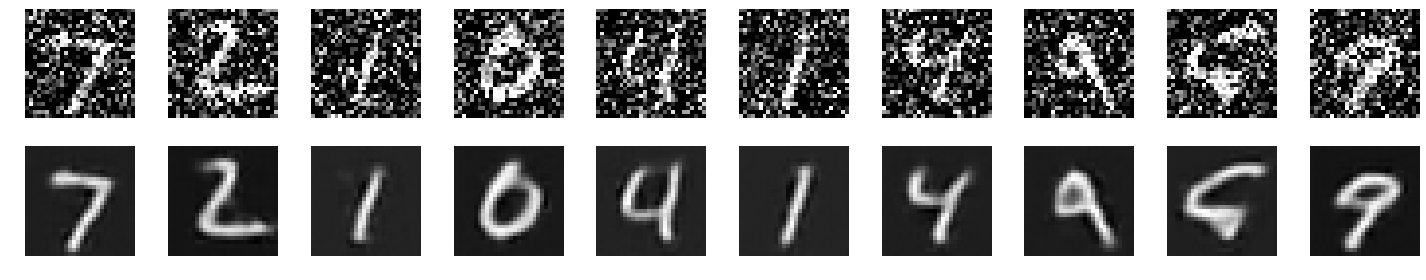

In [0]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

In [0]:
model.save("..\Sample_Model.h5")